# Exploartory Data Analysis of Stegnalysis

## Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

## This is how jpeg compression works

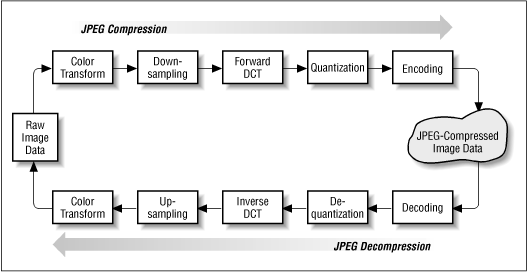

1. First the Raw images have 3 channels (RGB), composed by pixels, which describe the image (the colors).
2. That is transformed into YCbCr colorspace, composed by pixel in the same range as that of RGB(0-255) where Y represents Luminance of the Image and Cb, Cr represnets chrominance of the image.
3. Then the down-sampling is performed to decrease size of image which impacts the color code of the image but not easily recognized by naked eyes.
4. Then the Information is pass into DCT(Discrete Cosine Transform) coefficients which is of range (-1024,1024).
5. Then Quantization and Encoding of JPEG format is done

Stegano package documentation : this package hides the hidden information in the least significant bits of the image. These bits have the property of being very random (white noise), so they don't fire when some change is applied to them.  -- This change is done either in YCbCr or DCT coefficients which will be proved later through visualizations.

## Storing the path of Images in a DataFrame

In [20]:
base_path = '../input/alaska2-image-steganalysis'
def read_images_path(dir_name):
    '''series_name: 0001.jpg, 0002.jpg etc.
    series_paths: is the complete path to a certain image.'''
    series_name = pd.Series(os.listdir(base_path + '/' + dir_name))
    
    series_path = pd.Series(base_path + '/' + dir_name + '/' + series_name)
    
    return series_path

## Assigning DataFrame to Variables

In [21]:
cover_paths = read_images_path('Cover')
jmipod_paths = read_images_path('JMiPOD')
juniward_paths = read_images_path('JUNIWARD')
uerd_paths = read_images_path('UERD')

## Plotting Graphs

In [25]:
def show15(paths, title = 'Default'):
    plt.figure(figsize = (16,9))
    plt.suptitle(title, fontsize = 16)
    
    for k, path in enumerate(paths[:15]):
        image = mpimg.imread(path)
        
        plt.subplot(3,5,k+1)
        plt.imshow(image)
        plt.axis('off')

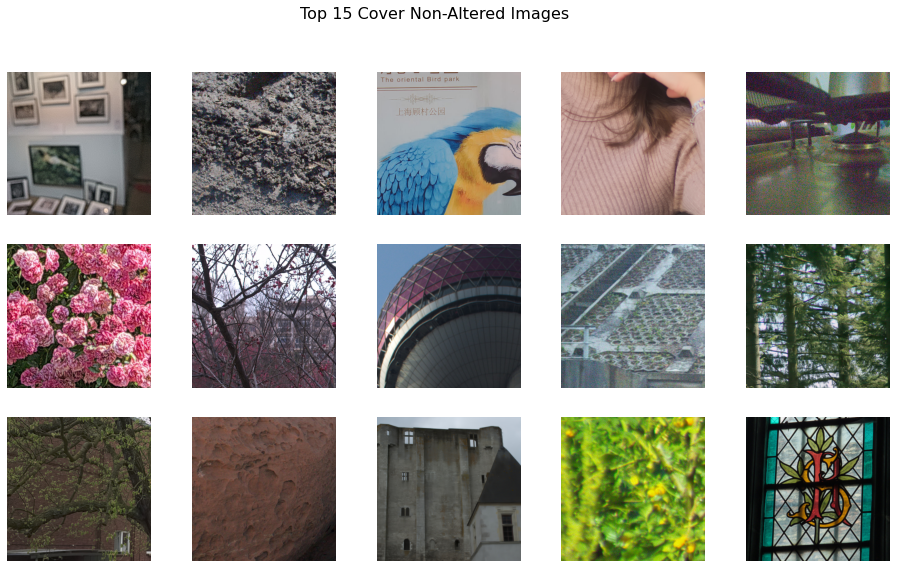

In [26]:
show15(cover_paths, 'Top 15 Cover Non-Altered Images')

### Comparing Original and Encoded Images

In [40]:
def show_img(n = 3, title = 'Default'):
    f, ax = plt.subplots(n, 4, figsize = (20,10))
    plt.suptitle(title, fontsize = 16)
    
    for index in range(n):
        cover = mpimg.imread(cover_paths[index])
        jmipod = mpimg.imread(jmipod_paths[index])
        juniward = mpimg.imread(juniward_paths[index])
        uerd = mpimg.imread(uerd_paths[index])
        
        ax[index, 0].imshow(cover)
        ax[index, 1].imshow(jmipod)
        ax[index, 2].imshow(juniward)
        ax[index, 3].imshow(uerd)
        
        # Add Titles
        if index == 0:
            ax[index, 0].set_title('Cover', fontsize = 12)
            ax[index, 0].set_title('JMiPOD', fontsize = 12)
            ax[index, 0].set_title('JUNIWARD', fontsize = 12)
            ax[index, 0].set_title('UERD', fontsize = 12)

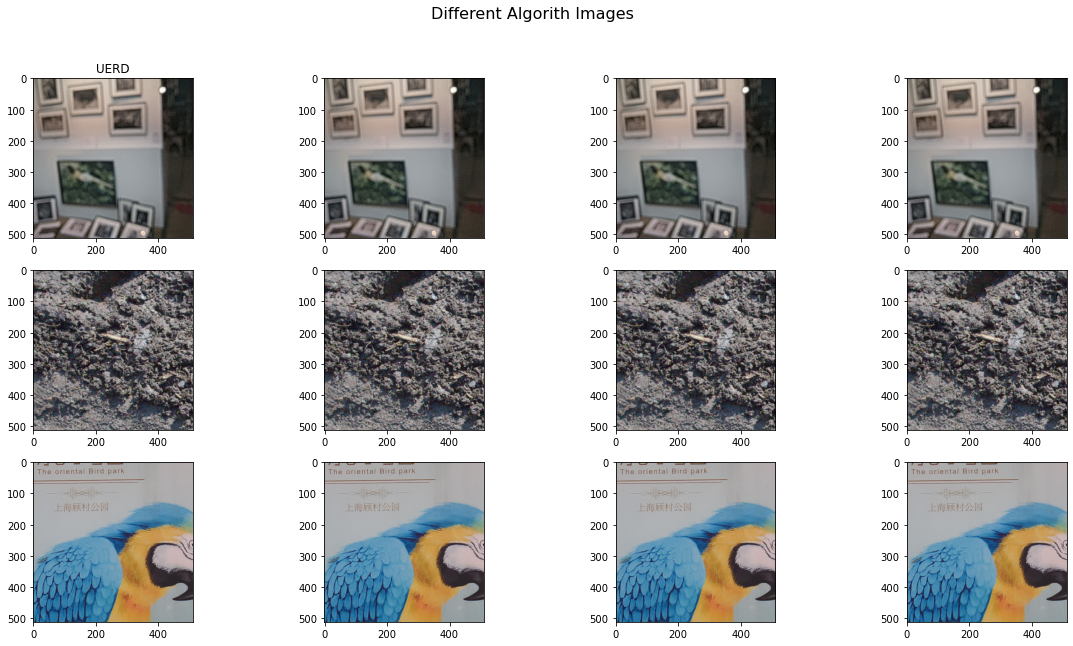

In [41]:
show_img(n=3, title = 'Different Algorith Images')

To our naked eyes all images looks similar, doesn't look that some secret message is embedded in this but while visualising DCT images we might get some hint of embedded message present in this.

 ### Plotting the pixel difference of secret msg embedded image and cover image

In [46]:
def show_img_diff(n = 3, title = 'Default'):
    f, ax = plt.subplots(n, 4, figsize = (20,10))
    plt.suptitle(title, fontsize = 16)
    
    for index in range(n):
        cover = mpimg.imread(cover_paths[index])
        jmipod = mpimg.imread(jmipod_paths[index])
        juniward = mpimg.imread(juniward_paths[index])
        uerd = mpimg.imread(uerd_paths[index])
        
        ax[index, 0].imshow(cover - cover)
        ax[index, 1].imshow(jmipod - cover)
        ax[index, 2].imshow(juniward - cover)
        ax[index, 3].imshow(uerd - cover)
        
        # Add Titles
        if index == 0:
            ax[index, 0].set_title('Cover', fontsize = 12)
            ax[index, 1].set_title('JMiPOD', fontsize = 12)
            ax[index, 2].set_title('JUNIWARD', fontsize = 12)
            ax[index, 3].set_title('UERD', fontsize = 12)

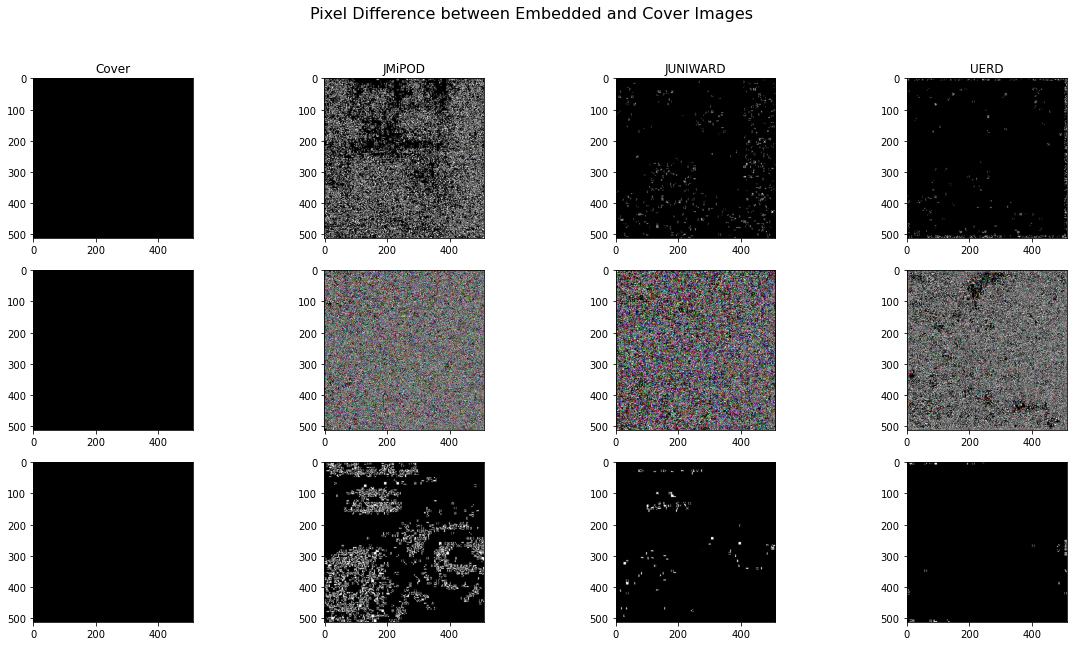

In [47]:
show_img_diff(n=3, title = 'Pixel Difference between Embedded and Cover Images')

As clearly seen above there is the change in the pixels of embedded images confirming precense of secret data in the images

In [37]:
! git clone https://github.com/dwgoon/jpegio
!pip install jpegio/.
import jpegio as jio

Cloning into 'jpegio'...
remote: Enumerating objects: 78, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 1232 (delta 34), reused 40 (delta 11), pack-reused 1154
Receiving objects: 100% (1232/1232), 231.39 MiB | 16.75 MiB/s, done.
Resolving deltas: 100% (609/609), done.
Processing ./jpegio
  Created wheel for jpegio: filename=jpegio-0.2.1-cp37-cp37m-linux_x86_64.whl size=1029486 sha256=d9d385b724787505126f2565cd453c79e2c1b34ae14b2049b348456c09f7565a
  Stored in directory: /tmp/pip-ephem-wheel-cache-wnjpfs9u/wheels/63/fa/8a/228404b42bb02e7b206de3032473b06abde4aa1058d2d0254e
Successfully built jpegio


Reference for plotting DCT Coeff Images: https://github.com/dwgoon/jpegio/blob/master/examples/jpegio_tutorial.ipynb

## Plotting DCT Coefficients of the Eac type of Image

In [48]:
def dct_coeff(n = 3, title = 'Default'):
    f, ax = plt.subplots(n, 4, figsize = (20,10))
    plt.suptitle(title, fontsize = 16)
    
    for index in range(n):
        cover = jio.read(cover_paths[index])
        coverDCT = np.zeros([512,512,3])
        coverDCT[:,:,0] = cover.coef_arrays[0]
        coverDCT[:,:,1] = cover.coef_arrays[1]
        coverDCT[:,:,2] = cover.coef_arrays[2]
        coverQTbl = cover.quant_tables[0]
        ax[index, 0].imshow(abs(coverDCT))
        
        jmipod = jio.read(jmipod_paths[index])
        jmipodDCT = np.zeros([512,512,3])
        jmipodDCT[:,:,0] = jmipod.coef_arrays[0]
        jmipodDCT[:,:,1] = jmipod.coef_arrays[1]
        jmipodDCT[:,:,2] = jmipod.coef_arrays[2]
        jmipodQTbl = jmipod.quant_tables[0]
        ax[index, 1].imshow(abs(jmipodDCT))
        
        juniward = jio.read(juniward_paths[index])
        juniwardDCT = np.zeros([512,512,3])
        juniwardDCT[:,:,0] = juniward.coef_arrays[0]
        juniwardDCT[:,:,1] = juniward.coef_arrays[1]
        juniwardDCT[:,:,2] = juniward.coef_arrays[2]
        juniwardQTbl = juniward.quant_tables[0]
        ax[index, 2].imshow(abs(juniwardDCT))
        
        uerd = jio.read(uerd_paths[index])
        uerdDCT = np.zeros([512,512,3])
        uerdDCT[:,:,0] = uerd.coef_arrays[0]
        uerdDCT[:,:,1] = uerd.coef_arrays[1]
        uerdDCT[:,:,2] = uerd.coef_arrays[2]
        uerdQTbl = uerd.quant_tables[0]
        ax[index, 3].imshow(abs(uerdDCT))
        
        # Add Titles
        if index == 0:
            ax[index, 0].set_title('Cover', fontsize = 12)
            ax[index, 1].set_title('JMiPOD', fontsize = 12)
            ax[index, 2].set_title('JUNIWARD', fontsize = 12)
            ax[index, 3].set_title('UERD', fontsize = 12)

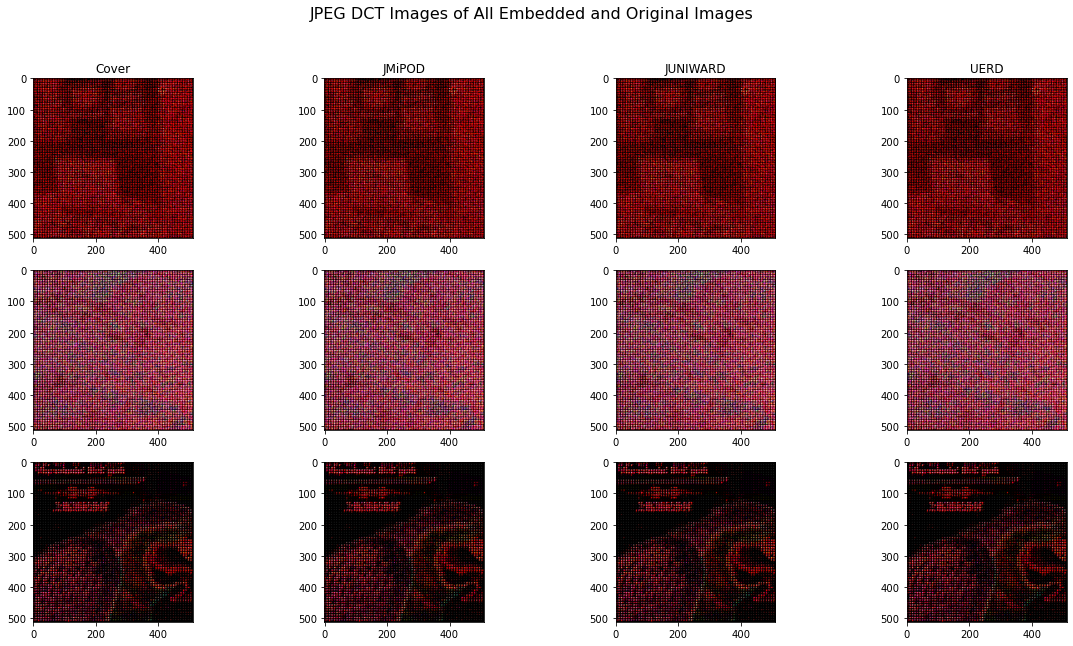

In [49]:
dct_coeff(n=3, title = 'JPEG DCT Images of All Embedded and Original Images')

Some difference can be visible to us now. Code for training and predicting is in the separate Notebook